In [67]:
from analyzer import get_trainer_log, extract_data, get_model_name
import sys
import os
import matplotlib.pyplot as plt

In [68]:
def plot_data(data, title, x_label, y_label, interval=1):
    x, y = data
    plt.plot(x[::interval], y[::interval])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [69]:
def plot_epoch(data, title, x_label, y_label, num_epochs=200,  fig=None):
    interval = 4
    x, y = data
    x, y = x[::interval], y[::interval]
    assert len(x) >= num_epochs
    if fig is  None:
        fig = plt.figure()
        plot = fig.add_subplot(111)
    else:
        plot = fig.get_axes()[0]
    plot.plot(range(num_epochs), y[:num_epochs])
    plot.set_title(title)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    return fig


def plot_one_log(log_file, rank=0, type="acc",num_epochs=200, fig=None):
    model_name = get_model_name(log_file)
    data = extract_data(
        get_trainer_log(log_file),
        rank=rank,
        data_type=type,
    )
    type_name = "Accuracy" if type == "acc" else "Loss"
    return plot_epoch(
        data,
        f"{model_name} {type_name} vs. Epoch",
        "Epoch",
        type_name,
        num_epochs=num_epochs,
        fig=fig,
    )


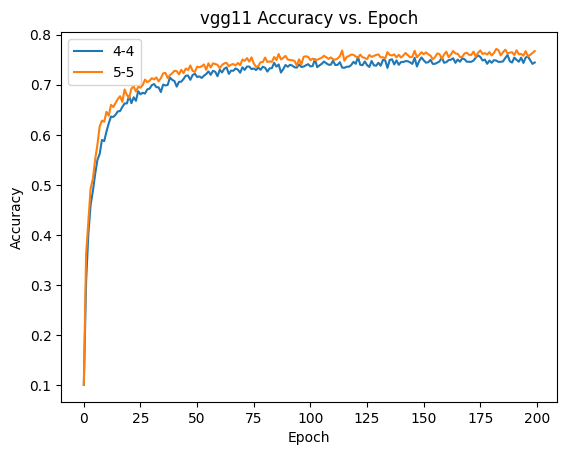

In [70]:
fig = plot_one_log("vgg11-4-4")
plot_one_log("vgg11-5-5", fig=fig)
plt.legend(["4-4", "5-5"])
plt.show()